This script plots Voltage Clamp Responses of Opto induced Currents 
1. for 1 file of all sweeps + average
2. for 2 files (comparing base + NA)


In [6]:
import pyabf 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import pyabf 
import seaborn as sns
import os
import math 

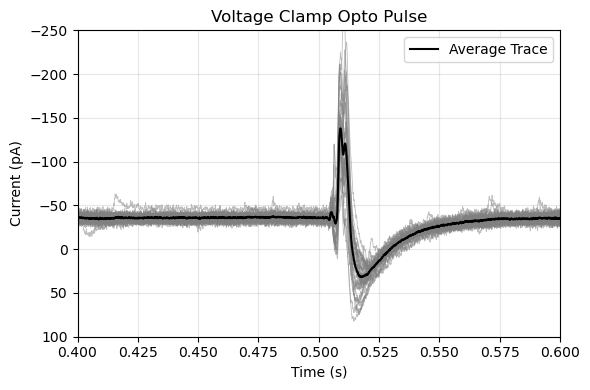

In [63]:
""" 
This script to plot currents (voltage clamp) from ABF files 

"""

base_dir = "Z:\Group Members\Rima\Ephys_NE\DATA\EPSC"
abf = pyabf.ABF(os.path.join(base_dir, "31.07.2025 M8/2025_07_31_0012.abf"))

# Initialize a list to store all sweeps
all_sweeps = []

# Plot individual traces
plt.figure(figsize=(6, 4))
for sweep in abf.sweepList:
    abf.setSweep(sweep)
    plt.plot(abf.sweepX, abf.sweepY, color='gray', linewidth=0.6, alpha=0.5)
    all_sweeps.append(abf.sweepY)

# Calculate and plot the average trace
average_trace = np.mean(all_sweeps, axis=0)
plt.plot(abf.sweepX, average_trace, color='black', linewidth=1.5, label="Average Trace")


plt.title("Voltage Clamp Opto Pulse")
plt.xlabel("Time (s)")
plt.ylabel("Current (pA)")
plt.legend(loc="upper right")
plt.grid(True, alpha=0.3)


xlim = [0.4, 0.6] 
ylim = [100, -250]
plt.xlim(xlim)
plt.ylim(ylim)

# Show the plot
plt.tight_layout()
plt.show()


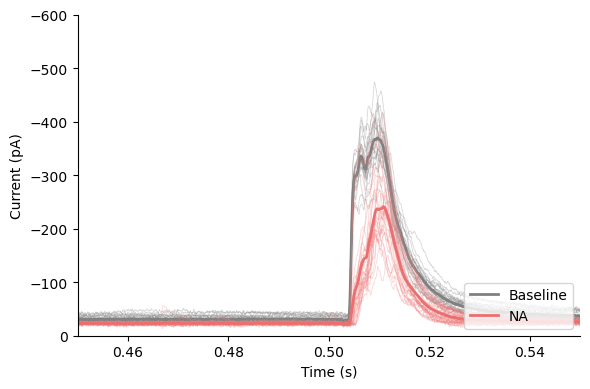

In [78]:


""" 
Plots 2 traces on top of each other to compare before and after NA
""" 


# Define the base directory and ABF file paths
base_dir = "Z:\Group Members\Rima\Ephys_NE\DATA\EPSC"
# abf_file_1 = os.path.join(base_dir,"01.08.2025 M9/2025_08_01_0006.abf")
# abf_file_2 = os.path.join(base_dir, "01.08.2025 M9/2025_08_01_0008.abf")  # Second ABF file


abf1 = os.path.join(base_dir, "31.07.2025 M8/2025_07_31_0013.abf")
abf2 = os.path.join(base_dir, "31.07.2025 M8/2025_07_31_0014.abf")

# Load the first ABF file
abf1 = pyabf.ABF(abf1)
all_sweeps_1 = []

# Plot individual traces for the first file
plt.figure(figsize=(6, 4))
for sweep in abf1.sweepList:
    abf1.setSweep(sweep)
    # Calculate standard deviation across sweeps
    std_trace_1 = np.std(all_sweeps_1, axis=0)
    # Plot the "cloud"      
    plt.plot(abf1.sweepX, abf1.sweepY, color='gray', linewidth=0.6, alpha=0.3)
    all_sweeps_1.append(abf1.sweepY)

# Calculate and plot the average trace for the first file
average_trace_1 = np.mean(all_sweeps_1, axis=0)
# plt.fill_between(abf1.sweepX, average_trace_1 - std_trace_1, average_trace_1 + std_trace_1, color='lightgray')
plt.plot(abf1.sweepX, average_trace_1, color='gray', linewidth=2, label="Baseline")

# Load the second ABF file
abf2 = pyabf.ABF(abf2)
all_sweeps_2 = []

# Plot individual traces for the second file
for sweep in abf2.sweepList:
    abf2.setSweep(sweep)
    # Plot the individual trace 
    plt.plot(abf2.sweepX, abf2.sweepY, color='lightcoral', linewidth=0.6, alpha=0.3)
    all_sweeps_2.append(abf2.sweepY)

# Calculate standard deviation AFTER collecting all sweeps
std_trace_2 = np.std(all_sweeps_2, axis=0)

# Calculate and plot the average trace for the second file
average_trace_2 = np.mean(all_sweeps_2, axis=0)
# plt.fill_between(abf2.sweepX, average_trace_2 - std_trace_2, average_trace_2 + std_trace_2, color='lightcoral', alpha=0.5)
plt.plot(abf2.sweepX, average_trace_2, color="#EB6F6F", linewidth=2, label="NA")


# Customize the plot
plt.xlabel("Time (s)")
plt.ylabel("Current (pA)")
plt.legend(loc="lower right")
plt.grid(False)

# Set x-axis limits if needed
xlim = [0.45, 0.55] 
ylim = [0, -600]
plt.ylim(ylim)
plt.xlim(xlim)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()
